In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Initialize the lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Adding custom stopwords
custom_stopwords = {'say', 'may', 'day', 'rs', 'says', 'get', 'held', 'new', 'year', 'crore', 'two'}
stop_words = stop_words.union(custom_stopwords)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
headline_2023=pd.read_csv('/content/headlines_2023.csv')

In [ ]:
#Removing blanks and those headlines which contain non relevant information
headline_2023=headline_2023[headline_2023['Heading'].notna()]
keywords = ['travel', 'yoga', 'lifestyle','Astrologer','bollywood','horoscope','astrology','life-style','tv/news']
headline_2023 = headline_2023[~headline_2023['Heading'].str.contains('|'.join(keywords), case=False, na=False)]
headline_2023=headline_2023[~headline_2023['Link'].str.contains('|'.join(keywords), case=False, na=False)]


# Function to tokenize, remove stop words, lemmatize, and filter out short words
def process_heading(text):
    if isinstance(text, str):  # Check if text is a string
        tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
        filtered_tokens = [
            word for word in tokens
            if word.isalnum() and word not in stop_words and len(word) > 2  # Remove stop words, non-alphanumeric tokens, and words <= 2 letters
        ]
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]  # Lemmatize the tokens
        return lemmatized_tokens
    else:
        return []  # Return an empty list for non-string values

# Apply the function to the Heading column
headline_2023['Processed_Heading'] = headline_2023['Heading'].apply(process_heading)

# Combine tokens into a single string
headline_2023['filtered_heading_string'] = headline_2023['Processed_Heading'].apply(lambda x: ' '.join(x))

# Filter for city-related headlines
headline_2023_city = headline_2023[headline_2023['Link'].str.startswith('http://timesofindia.indiatimes.com//city/')]
headline_2023_city['City'] = headline_2023_city['Link'].str.extract(r'city/([^/]+)')



<ipython-input-83-71c70cf3cd68>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headline_2023_city['City'] = headline_2023_city['Link'].str.extract(r'city/([^/]+)')


### Analysis framework

In [ ]:
# Define a function to extract page heading
def extract_text(url):
    prefix = "http://timesofindia.indiatimes.com//"
    if prefix in url:
        url_suffix = url.replace(prefix, "")
        return url_suffix.split('/')[0]  # Extract first text after the prefix
    return url  # Return original URL if prefix is not found

# Apply the function to each row of the 'link' column
headline_2023['page_heading'] = headline_2023['Link'].apply(extract_text)


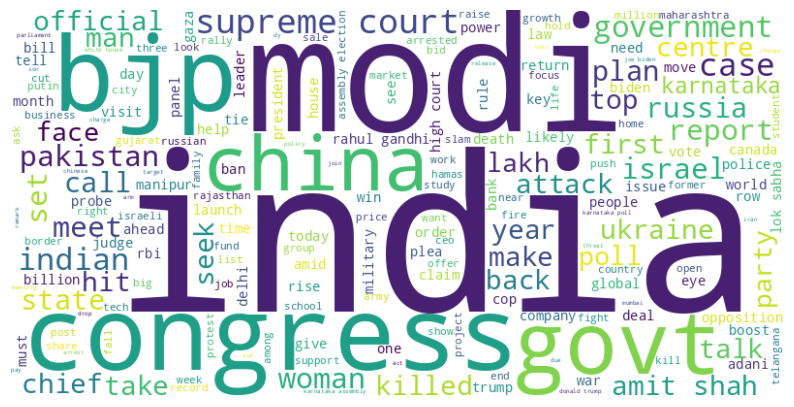

In [ ]:
# Analysis of pages with major news
general_page = ['world', 'india', 'politics', 'elections', 'business']

# dataset for major news analysis
headline_2023_general = pd.DataFrame()
for i in general_page:
    filtered_headlines = headline_2023[headline_2023['page_heading'] == i]
    headline_2023_general=pd.concat([headline_2023_general, filtered_headlines], ignore_index=True)
seed= 42
# Creating a word cloud
wordcloud = WordCloud(width=800, height=400,background_color='white',random_state=seed).generate(' '.join(headline_2023_general['filtered_heading_string']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

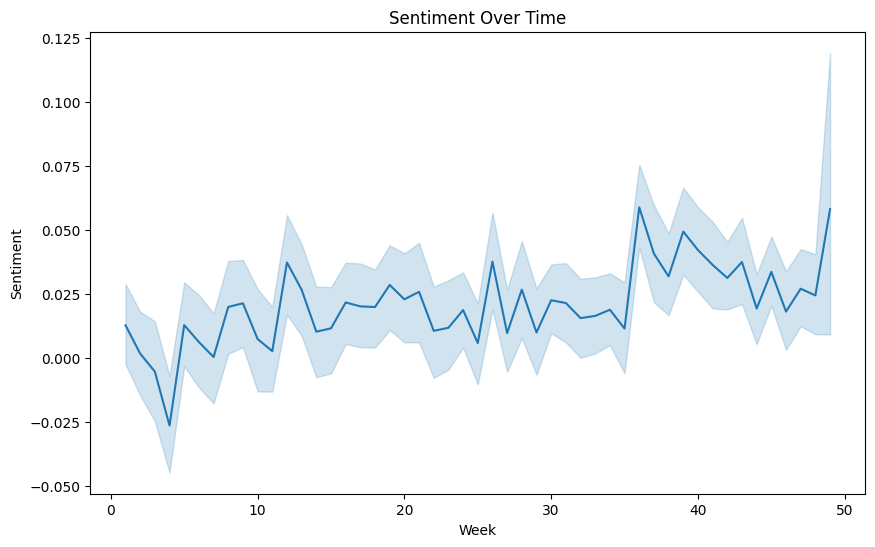

In [ ]:
from textblob import TextBlob

# Function to calculate sentiment
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
headline_2023_general['Sentiment'] = headline_2023_general['Heading'].apply(get_sentiment)

# Repeat the week numbers 1-52 for every 464 entries
weeks = (pd.Series(range(1, 53)).repeat(464)).reset_index(drop=True)

# Assign to the DataFrame
headline_2023_general['Week'] = weeks

# Plotting sentiment over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=headline_2023_general, x='Week', y='Sentiment')
plt.title('Sentiment Over Time')
plt.show()

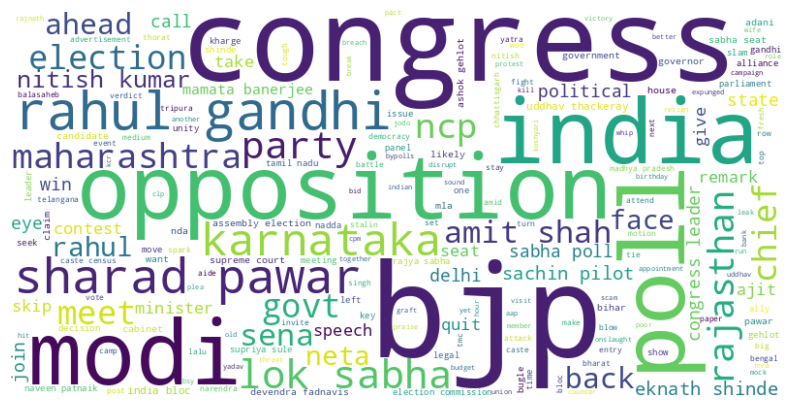

In [ ]:
# dataset for political analysis
page = ['politics']
headline_2023_political= pd.DataFrame()

for i in page:
    filtered_headlines = headline_2023[headline_2023['page_heading'] == i]
    headline_2023_political= pd.concat([headline_2023_political, filtered_headlines], ignore_index=True)

# Creating a word cloud
wordcloud = WordCloud(width=800, height=400,background_color='white',random_state=seed).generate(' '.join(headline_2023_political['filtered_heading_string']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

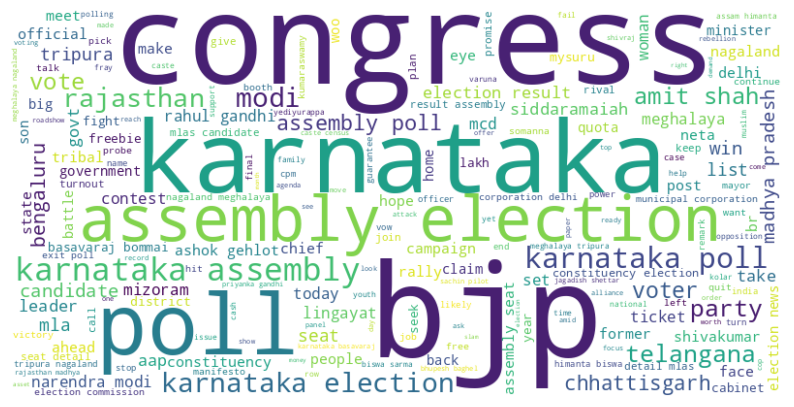

In [ ]:
# dataset for election analysis
page = ['elections']
headline_2023_elections= pd.DataFrame()

for i in page:
    filtered_headlines = headline_2023[headline_2023['page_heading'] == i]
    headline_2023_elections= pd.concat([headline_2023_elections, filtered_headlines], ignore_index=True)

# Creating a word cloud
wordcloud = WordCloud(width=800, height=400,background_color='white',random_state=seed).generate(' '.join(headline_2023_elections['filtered_heading_string']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

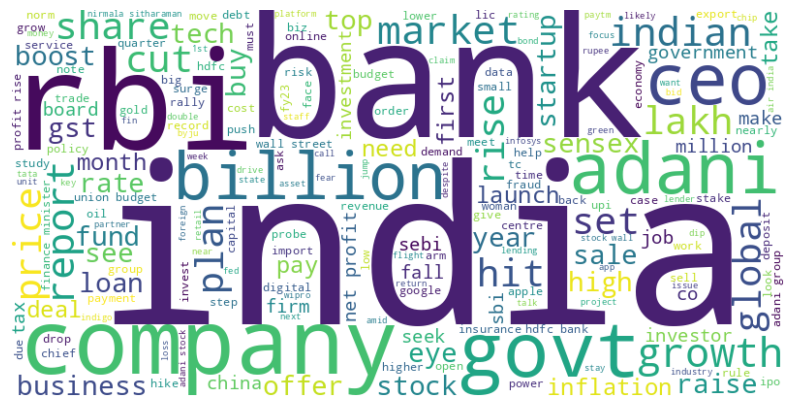

In [ ]:
# Dataset for business analysis
page = ['business']
headline_2023_business = pd.DataFrame()

# Creating the business dataframe
for i in page:
    filtered_headlines = headline_2023[headline_2023['page_heading'] == i]
    headline_2023_business = pd.concat([headline_2023_business, filtered_headlines], ignore_index=True)

# Removing unncessary rows
headline_2023_business = headline_2023_business.iloc[:-7]

# Apply sentiment analysis
headline_2023_business['Sentiment'] = headline_2023_business['Heading'].apply(get_sentiment)


# Creating a word cloud
wordcloud = WordCloud(width=800, height=400,background_color='white',random_state=seed).generate(' '.join(headline_2023_business['filtered_heading_string']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


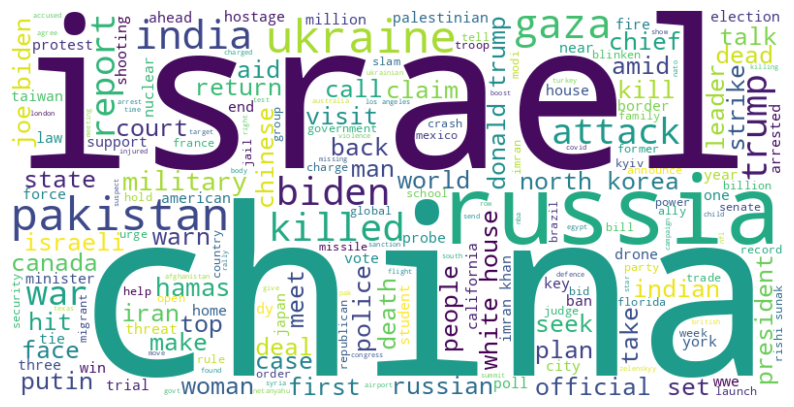

In [ ]:
# Dataset for world analysis
page = ['world']
headline_2023_world = pd.DataFrame()

# Creating the world dataframe
for i in page:
    filtered_headlines = headline_2023[headline_2023['page_heading'] == i]
    headline_2023_world = pd.concat([headline_2023_world, filtered_headlines], ignore_index=True)

# Removing unncessary rows
headline_2023_world = headline_2023_world.iloc[:-7]

# Apply sentiment analysis
headline_2023_world['Sentiment'] = headline_2023_world['Heading'].apply(get_sentiment)


# Creating a word cloud
wordcloud = WordCloud(width=800, height=400,background_color='white',random_state=seed).generate(' '.join(headline_2023_world['filtered_heading_string']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<ipython-input-91-769230dba9f9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_headline_city_env['City'] = df_headline_city_env['Link'].str.extract(r'city/([^/]+)')


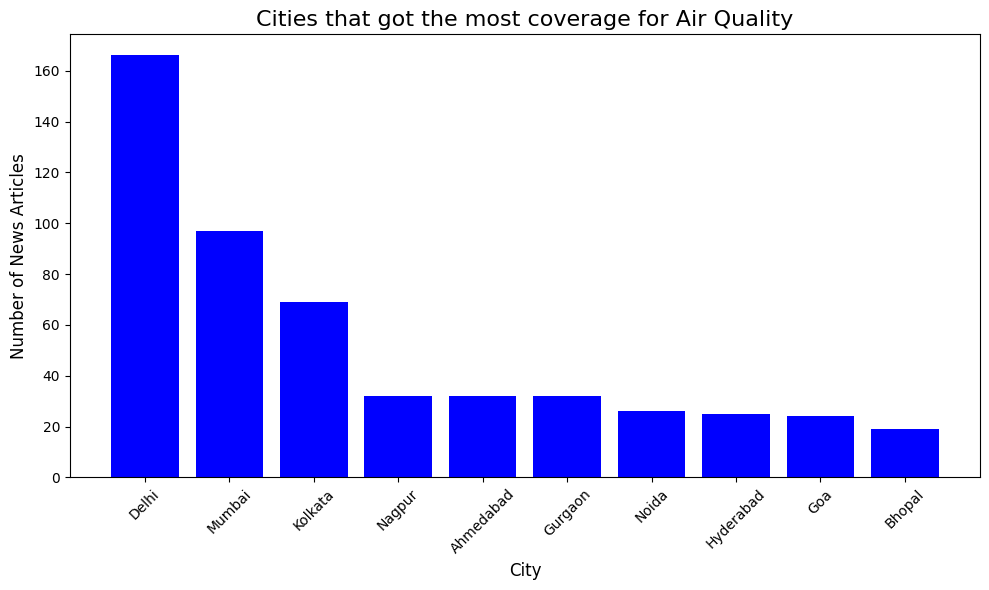

In [ ]:
# Define environmental terms to identify relevant headlines
environmental_terms = ["pollution", "air quality"]

# Function to check if a headline contains any environmental terms
def contains_environmental_terms(headline):
    return any(term in headline for term in environmental_terms)

# Applying the function to the 'filtered_heading_string' column
filtered_headlines = headline_2023[headline_2023['filtered_heading_string'].apply(contains_environmental_terms)]

# Filter the DataFrame to include only headlines from the Times of India city environment links
df_headline_city_env = filtered_headlines[filtered_headlines['Link'].str.startswith('http://timesofindia.indiatimes.com//city/')]

# Extract the city name from the 'Link'
df_headline_city_env['City'] = df_headline_city_env['Link'].str.extract(r'city/([^/]+)')

# Group the DataFrame by 'City', count the number of occurrences, sort them in descending order, and take the top 10
top_cities = df_headline_city_env.groupby('City').size().sort_values(ascending=False).head(10)
top_cities.index= top_cities.index.str.capitalize()
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_cities.index, top_cities.values, color='blue')  # Updated y to be the count/size of occurrences

# Set title and labels
plt.title('Cities that got the most coverage for Air Quality', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of News Articles', fontsize=12)  # Updated label to reflect counting occurrences

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-92-9e1435e3529a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headline_2023_city['Negative'] = headline_2023_city['filtered_heading_string'].apply(is_negative).astype(int)


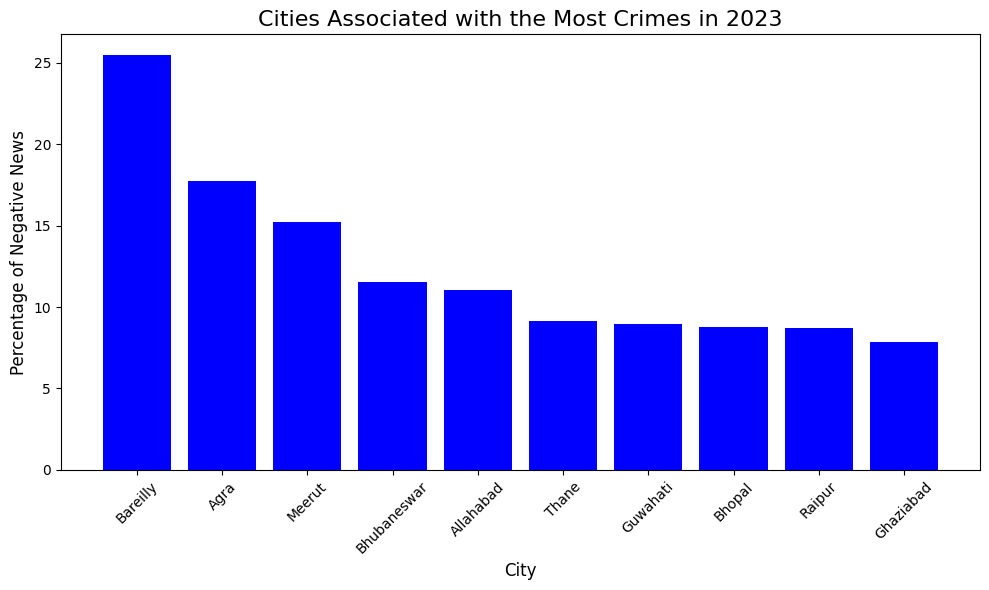

In [ ]:
# List of negative words
negative_words = ['murder', 'kill', 'rape', 'violence', 'murdered', 'killed', 'raped']

# Lemmatize the negative words
lemmatized_negatives = [lemmatizer.lemmatize(word) for word in negative_words]

# Function to check if any negative word is in the heading
def is_negative(heading):
    heading_lower = heading.lower()  # Convert heading to lowercase for case-insensitive match
    return any(word in heading_lower for word in lemmatized_negatives)

# Create the "Negative" column
headline_2023_city['Negative'] = headline_2023_city['filtered_heading_string'].apply(is_negative).astype(int)

# Group by city and calculate the percentage of negative headlines and total count
city_grouped = headline_2023_city.groupby('City')['Negative'].agg(['sum', 'count'])
city_grouped['Percentage Negative'] = (city_grouped['sum'] / city_grouped['count']) * 100

# Rename columns for clarity
city_grouped = city_grouped.rename(columns={'sum': 'Negative Count', 'count': 'Total Count'})

# Final table with city, percentage of negative headlines, and total count
final_table = city_grouped[['Negative Count', 'Total Count', 'Percentage Negative']].reset_index().sort_values('Percentage Negative',ascending=False)

# Capitalize the first letter of each city
final_table['City'] = final_table['City'].str.capitalize()

# Filter the data where 'Total Count' > 500 and get the top 10 rows
top_cities = final_table[final_table['Total Count'] > 500].head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_cities['City'], top_cities['Percentage Negative'], color='blue')

# Set title and labels
plt.title('Cities Associated with the Most Crimes in 2023', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Percentage of Negative News', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


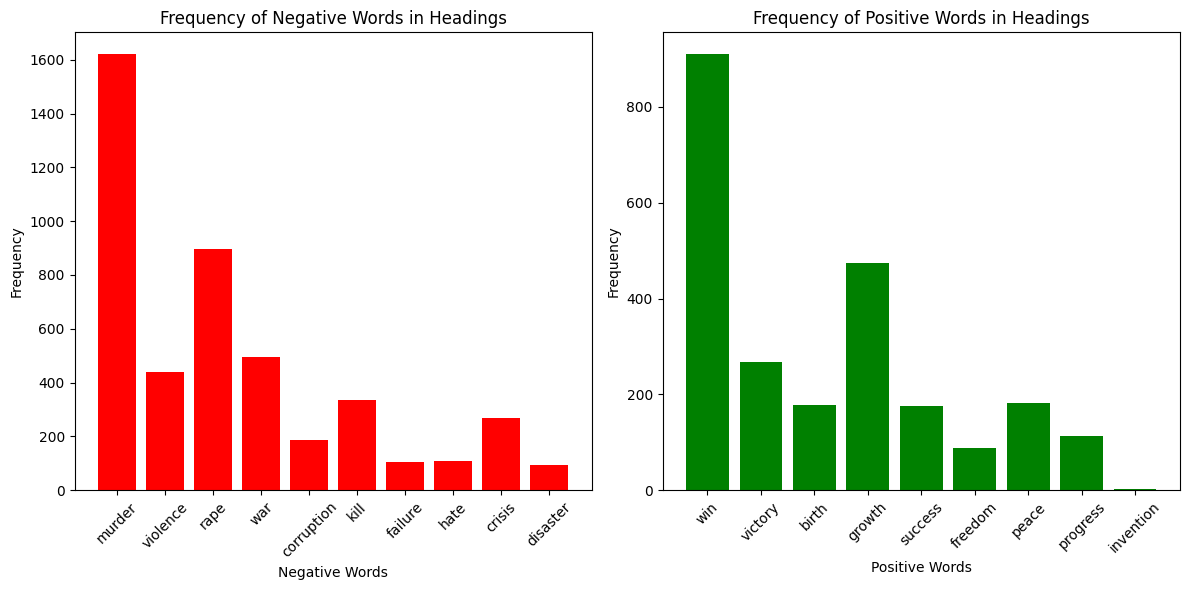

In [ ]:
# Define lists of positive and negative words
negative_words = ['murder', 'kill', 'rape', 'hate', 'disaster', 'war', 'crisis', 'violence', 'corruption','failure']
positive_words = [ 'freedom', 'win', 'success', 'peace', 'victory', 'growth','progress','birth','invention' ]

# Convert words to lowercase for case-insensitive matching
negative_words = [word.lower() for word in negative_words]
positive_words = [word.lower() for word in positive_words]

# Initialize counters for positive and negative word frequencies
negative_counts = Counter()
positive_counts = Counter()

# Loop through each row to extract headings and count word frequencies
for index, row in headline_2023.iterrows():
    heading = row['Heading']

    # Skip NaN or non-string values in 'Heading' column
    if pd.isna(heading) or not isinstance(heading, str):
        continue

    # Convert heading to lowercase and split into words
    words = re.findall(r'\b\w+\b', heading.lower())

    # Count occurrences of negative words
    for word in words:
        if word in negative_words:
            negative_counts[word] += 1

    # Count occurrences of positive words
    for word in words:
        if word in positive_words:
            positive_counts[word] += 1

# Prepare data for histogram
negative_word_freq = dict(negative_counts)
positive_word_freq = dict(positive_counts)

# Create a histogram for negative words
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(negative_word_freq.keys(), negative_word_freq.values(), color='red')
plt.title('Frequency of Negative Words in Headings')
plt.xlabel('Negative Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Create a histogram for positive words
plt.subplot(1, 2, 2)
plt.bar(positive_word_freq.keys(), positive_word_freq.values(), color='green')
plt.title('Frequency of Positive Words in Headings')
plt.xlabel('Positive Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Creating a Document-Term Matrix (DTM) using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
dtm = vectorizer.fit_transform(headline_2023['filtered_heading_string'])

# Extracting 5 major topics
num_topics = 5
#Model fitting
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(dtm)

# Displaying the topics
feature_names = vectorizer.get_feature_names_out()
# Iterating over each topic
for idx, topic in enumerate(nmf_model.components_):
  # Print the topic number (1-based index)
    print(f"Topic {idx + 1}:")

    # Get the indices of the top 5 terms for the current topic and sorting the last 5 highest values in descending order
    top_terms_indices = topic.argsort()[-5:][::-1]
    # Getting the top terms using the indices
    top_terms = [feature_names[i] for i in top_terms_indices]
    # Print the top terms as a comma-separated string
    print(", ".join(top_terms))


Topic 1:
man, arrested, wife, death, minor
Topic 2:
govt, delhi, bjp, state, school
Topic 3:
case, covid, court, murder, bail
Topic 4:
woman, cop, lakh, husband, booked
Topic 5:
killed, accident, road, dy, hit
